# 作業目標:

    通過建立多層的神經網路, 了解權值矩陣更新

# 作業重點: 

3  層神經網路

通過增加更多的中間層，以對更多關係的組合進行建模

syn1 權值矩陣將隱層的組合輸出映射到最終結果，

而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，

以從輸入資料中更好地產生這些組合

In [5]:
import numpy as np
 
# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])  
        
# define y for output dataset            
y = np.array([[0,0,1,1]]).T

# 輸出資料集進行初始化
# .T” 為轉置函數。經轉置後，該  y  矩陣便包含 4 column 1 row。
# 同我們的輸入一致，每一 column 是一個訓練實例，而每一row（僅有一row）對應一個輸出節點。
# 因此，我們的網路含有 3 個輸入， 1 個輸出

In [8]:
# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
# 亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
# 但每次開始訓練時，得到的權重初始集分佈都是完全一致的

# randomly initialize our weights with mean 0 
#用 “syn0” 來代指 (即“輸入層-第一層隱層”間權重矩陣）
#用 “syn1” 來代指 (即“輸入層-第二層隱層”間權重矩陣）

syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1

syn0_history = [syn0]
syn1_history = [syn1]
 
for j in range(60000):
 
    # Feed forward through layers 0, 1, and 2
    # l0 網路第 1 層，即網路輸入層。
    # l1 網路第 2 層，常稱作隱藏層。
    # l2 假定為網路最後一層，隨著訓練進行，其輸出應該逐漸接近正確結果
    
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))
 
    # how much did we miss the target value?
    # l2_error 該值說明了神經網路預測時“丟失”的數目。
    # l2_delta 該值為經確信度加權後的神經網路的誤差，除了確信誤差很小時，它近似等於預測誤差。
    # l1_error 該值為 l2_delta 經 syn1 加權後的結果，從而能夠計算得到中間層/隱層的誤差。
    # l1_delta 該值為經確信度加權後的神經網路 l1 層的誤差，除了確信誤差很小時，它近似等於 l1_error 。
    
    
    l2_error = y - l2
 
    if (j% 10000) == 0:
        print("L2_Error:" + str(np.mean(np.abs(l2_error))))
 
    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l2_delta = l2_error*nonlin(l2,deriv=True)
 
    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T)
    
    if (j% 10000) == 0:
        print("L1_Error:" + str(np.mean(np.abs(l2_error))))
    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    l1_delta = l1_error * nonlin(l1,deriv=True)
 
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)
    
    syn1_history.append(syn1)
    syn0_history.append(syn0)

L2_Error:0.4685343254580603
L1_Error:0.4685343254580603
L2_Error:0.005002426725395313
L1_Error:0.005002426725395313
L2_Error:0.0034544054615330507
L1_Error:0.0034544054615330507
L2_Error:0.0027865570196723556
L1_Error:0.0027865570196723556
L2_Error:0.002394115505520978
L1_Error:0.002394115505520978
L2_Error:0.0021288852682254155
L1_Error:0.0021288852682254155


神經網路訓練
for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

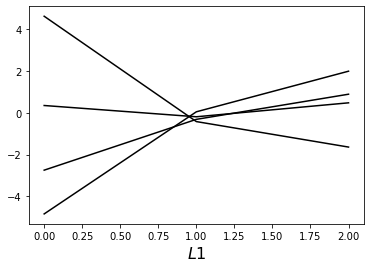

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(syn0_history[0], ms=3, lw=1.5, color='black')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()


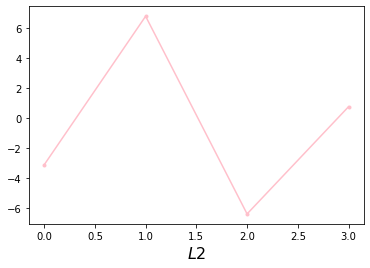

In [10]:
plt.plot(syn1_history[0], 'o-', ms=3, lw=1.5, color='pink')
plt.xlabel(r'$L2$', fontsize=16)
plt.show()

In [14]:
print("Output After Training (根據 L1):")
print(l1)
print()
print("Output After Training (根據 L2):")
print(l2)

Output After Training (根據 L1):
[[0.70867211 0.16196423 0.87991049 0.61679878]
 [0.63949508 0.11242379 0.88471674 0.57047777]
 [0.13455945 0.95169394 0.05443222 0.69503853]
 [0.10183474 0.92811932 0.0568646  0.65285215]]

Output After Training (根據 L2):
[[0.00197173]
 [0.00163392]
 [0.99804356]
 [0.99782397]]


###### 參考資源:  
1. 維基百科\herf{https://zh.wikipedia.org/zh-tw/%E5%AF%BC%E6%95%B0}  
2. https://blog.csdn.net/conggova/article/details/77799464  
3. https://ithelp.ithome.com.tw/articles/10198813